## Tutorial Video

In [181]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/0P7QnIQDBJY" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

#### Load necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Real World Examples

#### Line Graph

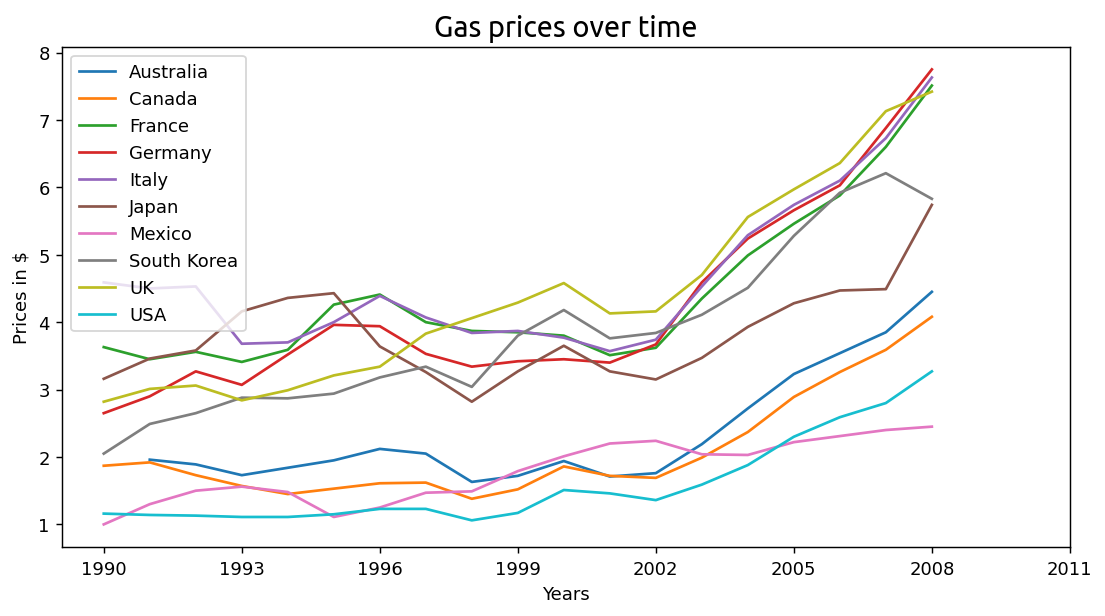

In [6]:
gas_data = pd.read_csv('gas_prices.csv')

# set size of the figure
plt.figure(figsize = (10, 5), dpi = 130)

# set a title
plt.title('Gas prices over time', fontdict = {'fontname': 'Ubuntu', 'fontsize': 16, 'fontweight': 'bold'})

# Plot the data points
# plt.plot(gas_data.Year, gas_data['Germany'], label = 'Germany')
# plt.plot(gas_data['Year'], gas_data.USA, label = 'USA')
# plt.plot(gas_data['Year'], gas_data['South Korea'], label = 'South Korea')

for country in gas_data.columns[1:]:
    plt.plot(gas_data.Year, gas_data[country], label = country)

# name the axes
plt.xlabel('Years')
plt.ylabel('Prices in $')

# mark the axes
plt.xticks(gas_data['Year'][::3].to_list() + [2011])

plt.legend()

plt.savefig('gas prices.png', dpi = 300)

plt.show()

### Load FIFA data

In [103]:
fifa = pd.read_csv('fifa_data.csv')
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Histograms

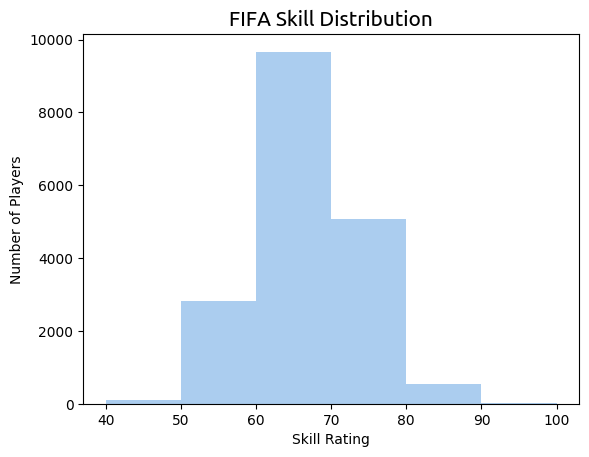

In [19]:
# create the points for x-axis
bins = [40, 50, 60, 70, 80, 90, 100]

# plot the histogram
plt.hist(fifa.Overall, bins = bins, color = '#abcdef')

# mark the x-axis
plt.xticks(bins)

# set the title and label the axes
plt.title('FIFA Skill Distribution', fontdict = {'fontname': 'Ubuntu', 'fontsize': 15})
plt.xlabel('Skill Rating')
plt.ylabel('Number of Players')


plt.show()

## Pie Charts

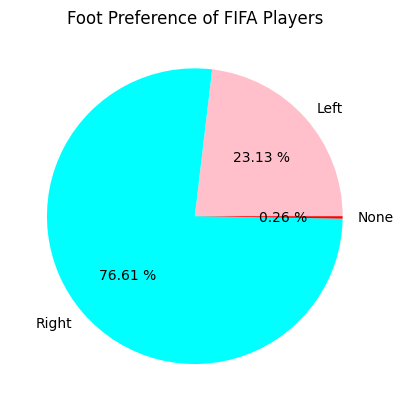

In [53]:
# number of people who prefer their left and right foot
numLeft = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
numRight = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]
numNan = fifa.loc[(fifa['Preferred Foot'] != 'Left') & (fifa['Preferred Foot'] != 'Right')].count()[0]

labels = ['Left', 'Right', 'None']
colors = ['Pink', 'Aqua', 'Red']

# make the pie chart
plt.pie([numLeft, numRight, numNan], labels = labels, colors = colors, autopct = '%.2f %%')

plt.title('Foot Preference of FIFA Players')

plt.show()

## More Pie Chart 

In [104]:
# remove the 'lbs' part from the weights
fifa.Weight = [float(x.strip('lbs')) if type(x) == str else x for x in fifa.Weight]

# convert the weights from pounds to kgs
fifa.Weight = [np.rint(x / 2.205) for x in fifa.Weight]

Changing above will divide the weights again and data will be changed, so using below

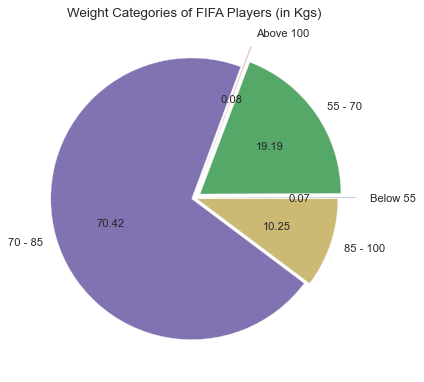

In [142]:
# Categorize players according to their weights

light = fifa.loc[fifa.Weight < 55].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 55) & (fifa.Weight < 70)].count()[0]
medium = fifa.loc[(fifa.Weight >= 70) & (fifa.Weight < 85)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 85) & (fifa.Weight < 100)].count()[0]
heavy = fifa.loc[(fifa.Weight >= 100)].count()[0]

# set a colour theme
plt.style.use('seaborn-v0_8')

weights = [light, light_medium, heavy, medium, medium_heavy]
labels = ['Below 55', '55 - 70', 'Above 100', '70 - 85', '85 - 100']
# colors = ['#1db4f0', '#eef090', '#f0246b', '#acf2cc', '#d390f0']
explode = (0.15, 0.05, 0.15, 0.02, 0.02)

plt.pie(weights, labels = labels, autopct = '%.2f', explode = explode)

plt.title('Weight Categories of FIFA Players (in Kgs)')

plt.show()

## Box and Whiskers Chart

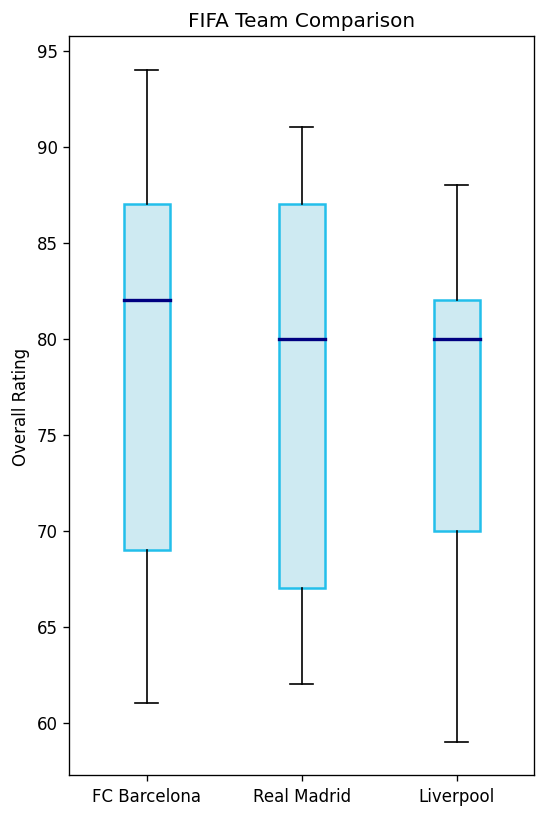

In [180]:
# set the default style
plt.style.use('default')

plt.figure(figsize = (5, 8), dpi = 120)

# get overall ratings of Barcelona and Madrid Players
fcb = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
rm = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
sevilla = fifa.loc[fifa.Club == 'Liverpool']['Overall']

labels = ['FC Barcelona', 'Real Madrid', 'Liverpool']

# plot a box chart
boxes = plt.boxplot([fcb, rm, sevilla], labels = labels, patch_artist = True, medianprops = {'linewidth': 2, 'color': 'navy'})

for box in boxes['boxes']:
    # set edge colour
    box.set(color = '#23bfeb', linewidth = 1.5)
    
    # change fill colour
    box.set(facecolor = '#ceeaf2')

# label the axes
plt.ylabel('Overall Rating')
plt.title('FIFA Team Comparison')

plt.savefig('Team Comparison.jpg')

plt.show()